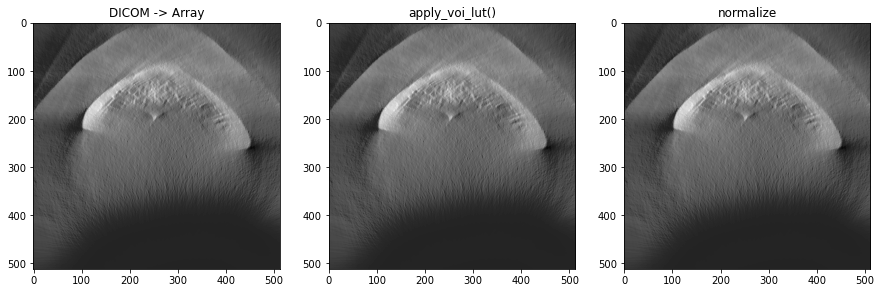

In [6]:
from filecmp import cmp
from cv2 import WINDOW_FULLSCREEN
import os
import numpy as np
import cv2, pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

window_center = -600
window_width = 1600

data_list = os.listdir('data/Sample1')
dicom_path = os.path.join('data/Sample1',data_list[0])
slice = pydicom.read_file(dicom_path)
s = int(slice.RescaleSlope)
b = int(slice.RescaleIntercept)
image = s * slice.pixel_array + b

plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
plt.title('DICOM -> Array')
plt.imshow(image, cmap='gray')

slice.WindowCenter = window_center
slice.WindowWidth = window_width
image = apply_modality_lut(image, slice)
image2 = apply_voi_lut(image, slice)
plt.subplot(1, 3, 2)
plt.title('apply_voi_lut()')
plt.imshow(image2, cmap='gray')

image3 = np.clip(image, window_center - (window_width / 2), window_center + (window_width / 2))
plt.subplot(1, 3, 3)
plt.title('normalize')
plt.imshow(image3, cmap='gray')

plt.show()